# データ加工ライブラリ入門

1. 代表的なもの
- Numpy（ナンパイ）：基本的な配列処理や数値計算をするライブラリ。高度で複雑な計算ができるほか、Pythonの通常の計算に比べて処理速度が速い。さまざまなところで使われており、データ分析で使うのに基本中の基本とも言えるライブラリ
- Scipy（サイパイ）：Numpyをさらに機能強化するライブラリ。統計や信号計算ができる
- Pandas（パンダス）： データフレーム形式でさまざまなデータを加工するためのライブラリ
- Matplotlib（マットプロットリブ）： データをグラフ化するためのライブラリ

In [27]:
# インポート
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第3位まで表示
%precision 3


'%.3f'

## Numpy(既知のものは飛ばす) 

In [28]:
# 配列の作成
data = np.array([9, 2, 3, 4, 10, 6, 7, 8, 1, 5])
data

array([ 9,  2,  3,  4, 10,  6,  7,  8,  1,  5])

In [29]:
## -1 は逆順という意味らしい
data[::-1].sort()
print("ソート後",data)

ソート後 [10  9  8  7  6  5  4  3  2  1]


In [30]:
## numpyは早い
## %timeitで処理時間を計測できる


# Nは乱数の発生数、10の6乗
N = 10**6

# Python版 (以下のrange(N)は0からN-1までの整数を用意しています。 
# 「_」は、代入した値を参照しないときに使う慣例的な変数名です。
# たとえば、for a in range(N)と書くのと同じですが、aと書くと、その値をあとで使うように見えるので、
# その値を参照しないときは、for _ in range(N)のように慣例的に書く書き方です
normal_data = [random.random() for _ in range(N)]

# Numoy版
numpy_random_data = np.array(normal_data)

# calc time :合計値
# ふつうの処理
%timeit sum(normal_data)

# Numpyを使った処理
%timeit np.sum(numpy_random_data)

5.36 ms ± 764 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
505 µs ± 74.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


#### <練習問題 2-1>


1から50までの自然数の和を計算するプログラムを書いて、最後の計算結果を表示させるプログラムを書いてください。ただし、np.arrayで1から50までの配列を作り、その総和を求める方法で計算してください。

In [31]:
def calc_sum(n):
    sum = []
    for i in range(1,n+1):
        sum.append(i)
    array = np.array(sum)
    return array.sum()
    
print("50までの自然数の和は",calc_sum(50))

50までの自然数の和は 1275


#### <練習問題 2-3>

要素がすべて3の5行5列の行列を作成し、その行列の2乗をする計算をしてみましょう。

In [38]:
#full(要素数,値)
matrix3 = np.full(25,3).reshape(5,5)
matrix3**2

array([[9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9]], dtype=int32)

## Scypy はいったん飛ばす(必要になったときに参照)

## pandas について

- 主なデータ型としてDFとSerieas型がある。
- データーベース的な取り扱いをする
- np.arrayやpd.seriesといったオブジェクトを生成するときのコンストラクタ：としてリストオブジェクトを渡す

In [43]:
from  pandas import  DataFrame ,Series 

## Series について
sample_pandas_data = pd.Series([0,10,20,30,40,50,60,70,80,90])
print(sample_pandas_data)

0     0
1    10
2    20
3    30
4    40
5    50
6    60
7    70
8    80
9    90
dtype: int64


In [44]:
## indexとvalueを持つ
print("index: ", sample_pandas_data.index)
print("vakue: ", sample_pandas_data.values)

index:  RangeIndex(start=0, stop=10, step=1)
vakue:  [ 0 10 20 30 40 50 60 70 80 90]


In [45]:
## indexに固有の値を渡すこともできる
sample_pandas_index_data = pd.Series(
    [0, 10,20,30,40,50,60,70,80,90],
    index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
print(sample_pandas_index_data)

a     0
b    10
c    20
d    30
e    40
f    50
g    60
h    70
i    80
j    90
dtype: int64


### DFについて

- これはデータベースみたいなものでSQL操作をめっちゃ簡単に行える。便利～
- 主導で作成するときは辞書オブジェクトを渡して生成する
- 転置機能　.T
- 一つのカラムではSeriesオブジェクトが対応

In [51]:
attri_data1 = {'ID':['100','101','102','103','104'],
               'City':['Tokyo','Osaka','Kyoto','Hokkaido','Tokyo'],
               'Birth_year':[1990,1989,1992,1997,1982],
               'Name':['Hiroshi','Akiko','Yuki','Satoru','Steve']}

attri_data_frame1 = DataFrame(attri_data1)

attri_data_frame1

,ID,City,Birth_year,Name
0,100,Tokyo,1990,Hiroshi
1,101,Osaka,1989,Akiko
2,102,Kyoto,1992,Yuki
3,103,Hokkaido,1997,Satoru
4,104,Tokyo,1982,Steve


In [52]:
attri_data_frame_index1 = DataFrame(attri_data1,index=['a','b','c','d','e'])
attri_data_frame_index1

,ID,City,Birth_year,Name
a,100,Tokyo,1990,Hiroshi
b,101,Osaka,1989,Akiko
c,102,Kyoto,1992,Yuki
d,103,Hokkaido,1997,Satoru
e,104,Tokyo,1982,Steve


In [53]:
#転置を行う
attri_data_frame1.T

,0,1,2,3,4
ID,100,101,102,103,104
City,Tokyo,Osaka,Kyoto,Hokkaido,Tokyo
Birth_year,1990,1989,1992,1997,1982
Name,Hiroshi,Akiko,Yuki,Satoru,Steve


In [54]:
#特定業の抽出
#複数行抽出ではリスト形式で渡す(オブジェクト指向的なアクセスができる)

attri_data_frame1.Birth_year

0    1990
1    1989
2    1992
3    1997
4    1982
Name: Birth_year, dtype: int64

In [55]:
attri_data_frame1[["ID","Birth_year"]]

,ID,Birth_year
0,100,1990
1,101,1989
2,102,1992
3,103,1997
4,104,1982


### データの抽出

- 服問い合わせ的手法と純粋なwhere句的な検索方法がある
- 複数指定はisinを使う

In [58]:
## 服問い合わせ的手法
##attri_data_frame1["City"]=="Tokyo" がTrueのindexに対応するレコードを返す
attri_data_frame1[attri_data_frame1["City"]=="Tokyo"]

,ID,City,Birth_year,Name
0,100,Tokyo,1990,Hiroshi
4,104,Tokyo,1982,Steve


In [59]:
#　条件（フィルター、複数の値）
attri_data_frame1[attri_data_frame1['City'].isin(['Tokyo','Osaka'])]

,ID,City,Birth_year,Name
0,100,Tokyo,1990,Hiroshi
1,101,Osaka,1989,Akiko
4,104,Tokyo,1982,Steve


### 削除と結合
- レコードを消したい場合はaxis=0を指定
- 属性消去はaxis=1
- inplace=True 属性で本体を変更できる

In [61]:
# データの列の削除
attri_data_frame1.drop(['Birth_year'], axis = 1)

,ID,City,Name
0,100,Tokyo,Hiroshi
1,101,Osaka,Akiko
2,102,Kyoto,Yuki
3,103,Hokkaido,Satoru
4,104,Tokyo,Steve


## 結合

In [62]:
# 別のデータの準備
attri_data2 = {'ID':['100','101','102','105','107'],
               'Math':[50,43,33,76,98],
               'English':[90,30,20,50,30],
               'Sex':['M','F','F','M','M']}
attri_data_frame2 = DataFrame(attri_data2)
attri_data_frame2

,ID,Math,English,Sex
0,100,50,90,M
1,101,43,30,F
2,102,33,20,F
3,105,76,50,M
4,107,98,30,M


In [65]:
# データのマージ（内部結合)
pd.merge(attri_data_frame1,attri_data_frame2)

,ID,City,Birth_year,Name,Math,English,Sex
0,100,Tokyo,1990,Hiroshi,50,90,M
1,101,Osaka,1989,Akiko,43,30,F
2,102,Kyoto,1992,Yuki,33,20,F


In [67]:
## groupbyも属性はリスト
attri_data_frame2.groupby(["Sex"])["Math"].mean()

Sex
F    38.000000
M    74.666667
Name: Math, dtype: float64

### null判定


In [73]:
# データの準備
attri_data2 = {'ID':['100','101','102','103','104'],
               'City':['Tokyo','Osaka','Kyoto','Hokkaido','Tokyo'],
               'Birth_year':[1990,1989,1992,1997,1982],
               'Name':['Hiroshi','Akiko','Yuki','Satoru','Steve']}
attri_data_frame2 = DataFrame(attri_data2)
attri_data_frame_index2 = DataFrame(attri_data2,index=['e','b','a','d','c'])
attri_data_frame_index2

,ID,City,Birth_year,Name
e,100,Tokyo,1990,Hiroshi
b,101,Osaka,1989,Akiko
a,102,Kyoto,1992,Yuki
d,103,Hokkaido,1997,Satoru
c,104,Tokyo,1982,Steve


In [75]:
##文字列が入っているか確認
attri_data_frame_index2.isin(["Tokyo"])

,ID,City,Birth_year,Name
e,False,True,False,False
b,False,False,False,False
a,False,False,False,False
d,False,False,False,False
c,False,True,False,False


In [77]:
## Nullで埋めるときはnp.nanを使う
attri_data_frame_index2["Name"] = np.nan
attri_data_frame_index2

,ID,City,Birth_year,Name
e,100,Tokyo,1990,NaN
b,101,Osaka,1989,NaN
a,102,Kyoto,1992,NaN
d,103,Hokkaido,1997,NaN
c,104,Tokyo,1982,NaN


In [79]:
##null判定は
attri_data_frame_index2.isnull()

,ID,City,Birth_year,Name
e,False,False,False,True
b,False,False,False,True
a,False,False,False,True
d,False,False,False,True
c,False,False,False,True


In [80]:
attri_data_frame_index2.isnull().sum()
#Trueを集計している

ID            0
City          0
Birth_year    0
Name          5
dtype: int64

#### <練習問題 2-7>

以下のデータに対して、`Money`が500以上の人を絞り込んで、レコードを表示してください。

In [81]:
from pandas import Series,DataFrame
import pandas as pd

attri_data1 = {'ID':['1','2','3','4','5'],
               'Sex':['F','F','M','M','F'],
               'Money':[1000,2000,500,300,700],
               'Name':['Saito','Horie','Kondo','Kawada','Matsubara']}

In [86]:
attri_data1_df = pd.DataFrame(attri_data1)
attri_data1_df_more500 = attri_data1_df[attri_data1_df.Money >= 500]
attri_data1_df_more500

,ID,Sex,Money,Name
0,1,F,1000,Saito
1,2,F,2000,Horie
2,3,M,500,Kondo
4,5,F,700,Matsubara


#### <練習問題 2-8>

<練習問題 2-7>のデータに対して、男女別（`MF`別）の平均`Money`を求めてください。

In [88]:
attri_data1_df_more500.groupby(["Sex"])["Money"].mean()

Sex
F    1233.333333
M     500.000000
Name: Money, dtype: float64

## MatplotlibとSeaborn

In [89]:
# Matplotlib と Seabornの読み込み
# Seabornはきれいに図示できる
import matplotlib as mpl
import seaborn as sns

# pyplotにはpltの別名で実行できるようにする
import matplotlib.pyplot as plt

# Jupyter Notebook上でグラフを表示させるために必要なマジックコマンド
%matplotlib inline

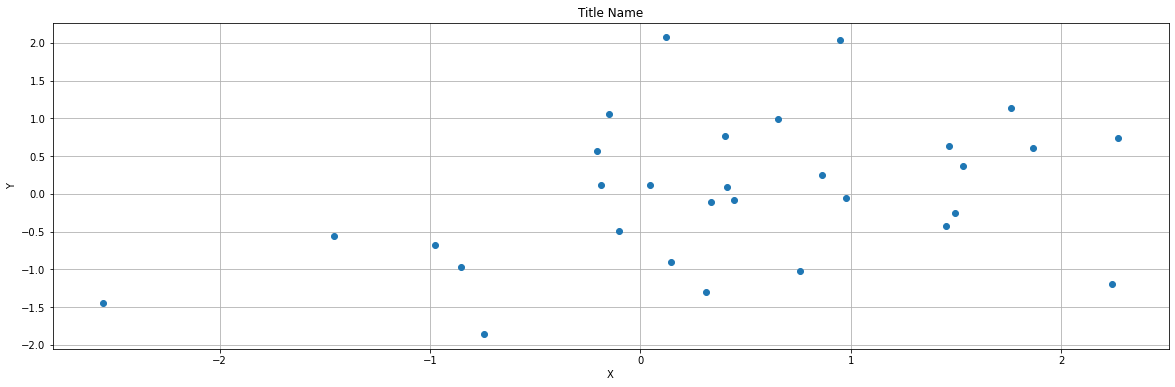

In [90]:
# 散布図
import numpy.random as random

#　シード値の固定
random.seed(0)

# x軸のデータ
x = np.random.randn(30)

# y軸のデータ
y = np.sin(x) + np.random.randn(30)

# グラフの大きさ指定（20や6を変更してみてください）
plt.figure(figsize=(20, 6))

# グラフの描写
plt.plot(x, y, 'o')

#以下でも散布図が描ける
#plt.scatter(x, y)

# タイトル
plt.title('Title Name')
# Xの座標名
plt.xlabel('X')
# Yの座標名
plt.ylabel('Y')

# grid（グラフの中にある縦線と横線）の表示
plt.grid(True)

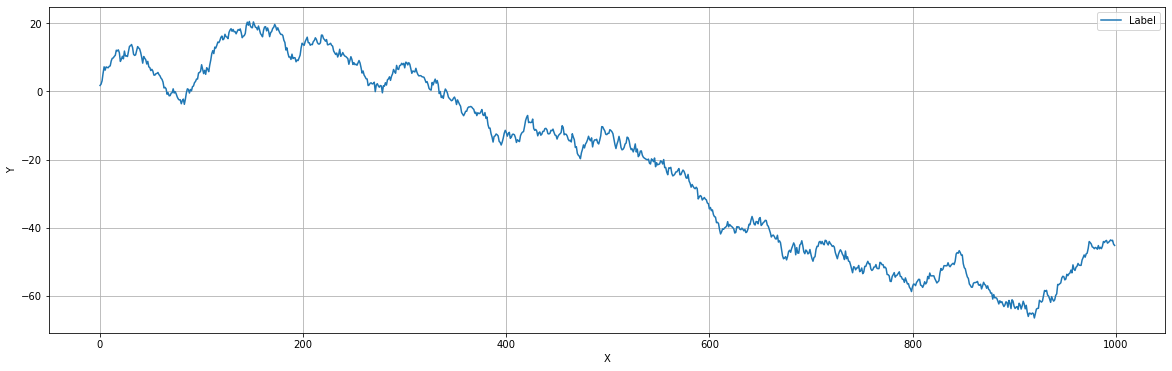

In [91]:
# 連続曲線

# シード値の指定
np.random.seed(0)

# データの範囲
numpy_data_x = np.arange(1000)

# 乱数の発生と積み上げ
numpy_random_data_y = np.random.randn(1000).cumsum()

# グラフの大きさを指定
plt.figure(figsize=(20, 6))

# label=とlegendでラベルをつけることが可能
plt.plot(numpy_data_x, numpy_random_data_y, label='Label')
plt.legend()

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

## 以外に便利なサブプロット
- グラフを行列としてみる

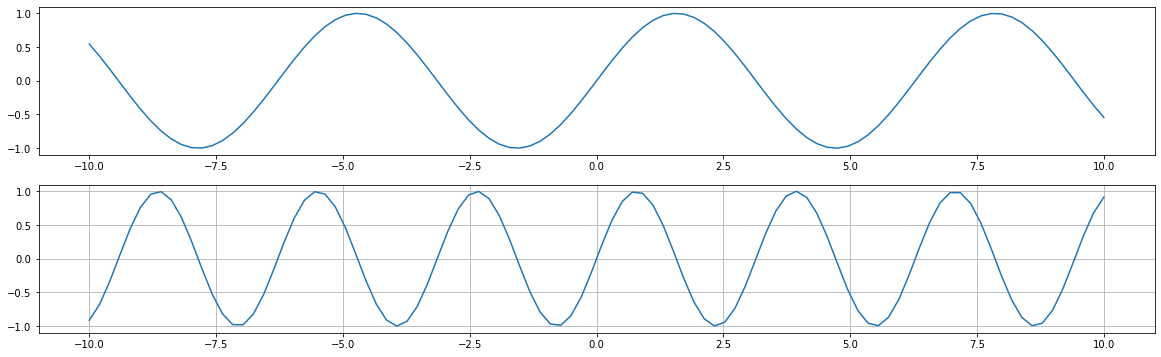

In [92]:
# グラフの大きさを指定
plt.figure(figsize=(20, 6))

# 2行1列のグラフの1つ目
plt.subplot(2,1,1)
x = np.linspace(-10, 10,100)
plt.plot(x, np.sin(x)) 

# 2行1列のグラフの2つ目
plt.subplot(2,1,2)
y = np.linspace(-10, 10,100)
plt.plot(y, np.sin(2*y)) 

plt.grid(True)

## 練習問題を何個かやってみる

#### <練習問題 2-10>

$y = 5x + 3$ （$x$は$-10$から$10$の値）のグラフを描いてみましょう。

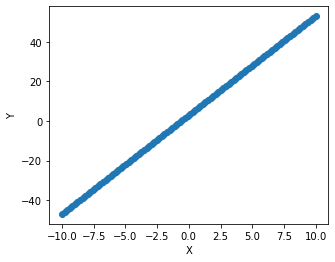

In [107]:
def func(x):
    return 5*x+3
## linspaceはindexは0~99で99で10
x = np.linspace(-10 , 10 , 100)
y = func(x)
plt.figure(figsize=(5,4))
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x,y,"o")